In [9]:
import pandas as pd;
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

pd.set_option('display.float_format', lambda x: '%.2f' % x)
path = '../../../k6/results/ssrh/'

def convert_to_MiB(value):
    if 'GiB' in value:
        return str(int(float(value.replace('GiB', '')) * 1024))
    if 'MiB' in value:
        return value.replace('MiB', '')
    if 'B' in value:
        return str(int(float(value.replace('B', '')) / 1024))
    return value

def detect_outliers(df, features, contamination=0.1):
    clf = IsolationForest(contamination=contamination, random_state=42)
    outliers = clf.fit_predict(df[features])
    return outliers == 1

def graph_row(plot_func, dataset, features, height=3, width=20):
    cols = len(features)
    fig, axes = plt.subplots(ncols=cols, figsize=(width, height))
    plt.subplots_adjust(hspace=0.3, wspace=0.3, top=0.95, bottom=0.05)
    for x, f in enumerate(features):
        plot_func(dataset, f, axes[x], idx=x)
    return plt



In [10]:
dirty_df = pd.read_csv(f'{path}10000/metrics.csv', sep=',')

duration = ['duration_mean', 'duration_min', 'duration_max', 'duration_count']
throughput = ['throughput_mean', 'throughput_min', 'throughput_max', 'throughput_count']
err = ['err_mean', 'err_count']
services = ["monolith", "teasers", "recommendations", "cdn", "discovery"]

print(f'NaN rows: \n{dirty_df[[*duration, *throughput]].isna().sum()}')

dirty_df = dirty_df[dirty_df['timestamp'] >= 30].dropna(subset=[*duration, *throughput]).reset_index(drop=True)

masks = {}

mask = detect_outliers(dirty_df, [*duration, *throughput])
df_10000 = dirty_df[mask].copy().reset_index(drop=True)

NaN rows: 
duration_mean       0
duration_min        0
duration_max        0
duration_count      0
throughput_mean     1
throughput_min      1
throughput_max      1
throughput_count    0
dtype: int64


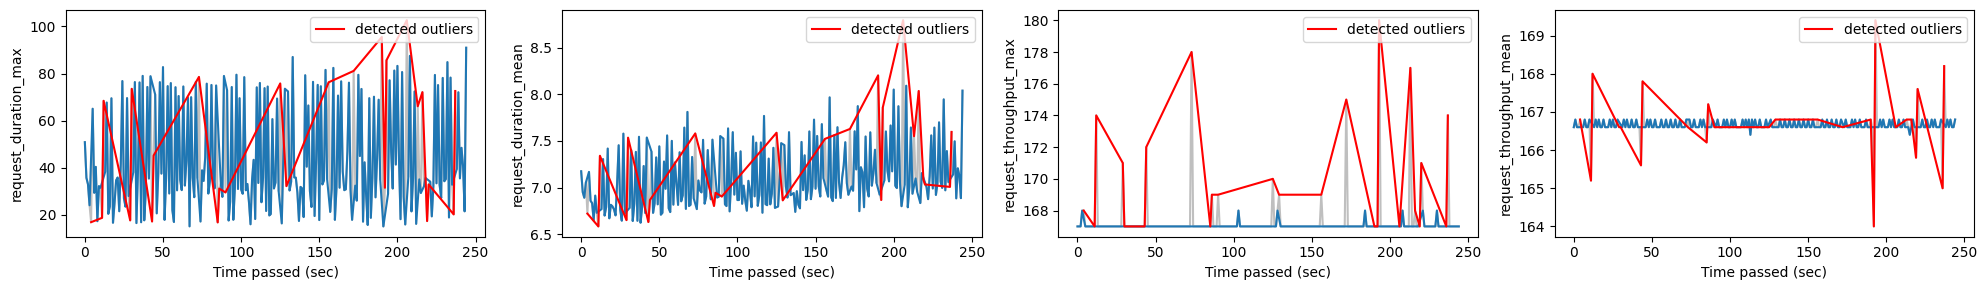

In [11]:
def plot_outliers(_df, f, loc, idx):
    loc.plot(_df[f], color='gray', alpha=0.5)
    loc.plot(_df[f][mask])
    loc.plot(_df[f][~mask], label='detected outliers', color='red')

    loc.set_ylabel(f'request_{f}') 
    loc.set_xlabel('Time passed (sec)') 
    loc.legend(loc="upper right")

graph_row(plot_outliers, dirty_df, ['duration_max','duration_mean','throughput_max','throughput_mean',])
plt.tight_layout()
plt.show()

In [12]:
dirty_df = pd.read_csv(f'{path}5000/metrics.csv', sep=',')

duration = ['duration_mean', 'duration_min', 'duration_max', 'duration_count']
throughput = ['throughput_mean', 'throughput_min', 'throughput_max', 'throughput_count']
err = ['err_mean', 'err_count']
services = ["monolith", "teasers", "recommendations", "cdn", "discovery"]

print(f'NaN rows: \n{dirty_df[[*duration, *throughput]].isna().sum()}')

dirty_df = dirty_df[dirty_df['timestamp'] >= 30].dropna(subset=[*duration, *throughput]).reset_index(drop=True)

masks = {}

mask = detect_outliers(dirty_df, [*duration, *throughput])
df_5000 = dirty_df[mask].copy().reset_index(drop=True)

NaN rows: 
duration_mean       0
duration_min        0
duration_max        0
duration_count      0
throughput_mean     0
throughput_min      0
throughput_max      0
throughput_count    0
dtype: int64


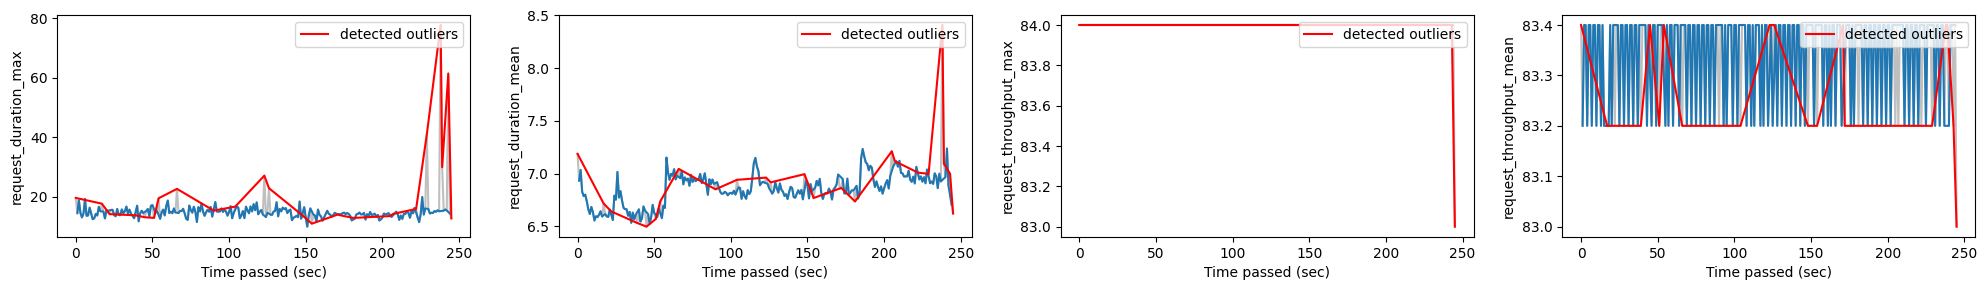

In [13]:
def plot_outliers(_df, f, loc, idx):
    loc.plot(_df[f], color='gray', alpha=0.5)
    loc.plot(_df[f][mask])
    loc.plot(_df[f][~mask], label='detected outliers', color='red')

    loc.set_ylabel(f'request_{f}') 
    loc.set_xlabel('Time passed (sec)') 
    loc.legend(loc="upper right")

graph_row(plot_outliers, dirty_df, ['duration_max','duration_mean','throughput_max','throughput_mean',])
plt.tight_layout()
plt.show()

In [7]:
# def plot_outliers(_df, d, loc, mask):
#     loc.plot(_df['cpu_percent'], color='gray', alpha=0.5)
#     loc.plot(_df['cpu_percent'][mask[d]])
#     loc.plot(_df['cpu_percent'][~mask[d]], label='detected outliers', color='red')

#     loc.set_title(d)
#     loc.set_ylabel(f'CPU percentage') 
#     loc.set_xlabel('Docker snapshot #') 
#     loc.legend(loc="upper right")

# masks = {}
# dfs = {}

# for name, _df in dirty_dfs.items():
#     mask = detect_outliers(_df, features)
#     masks[name] = mask
#     dfs[name] = _df[mask].copy()

# graph_row(lambda _ds, loc, idx: plot_outliers(_ds, list(dfs.keys())[idx], loc, masks), dirty_dfs)
# plt.show()

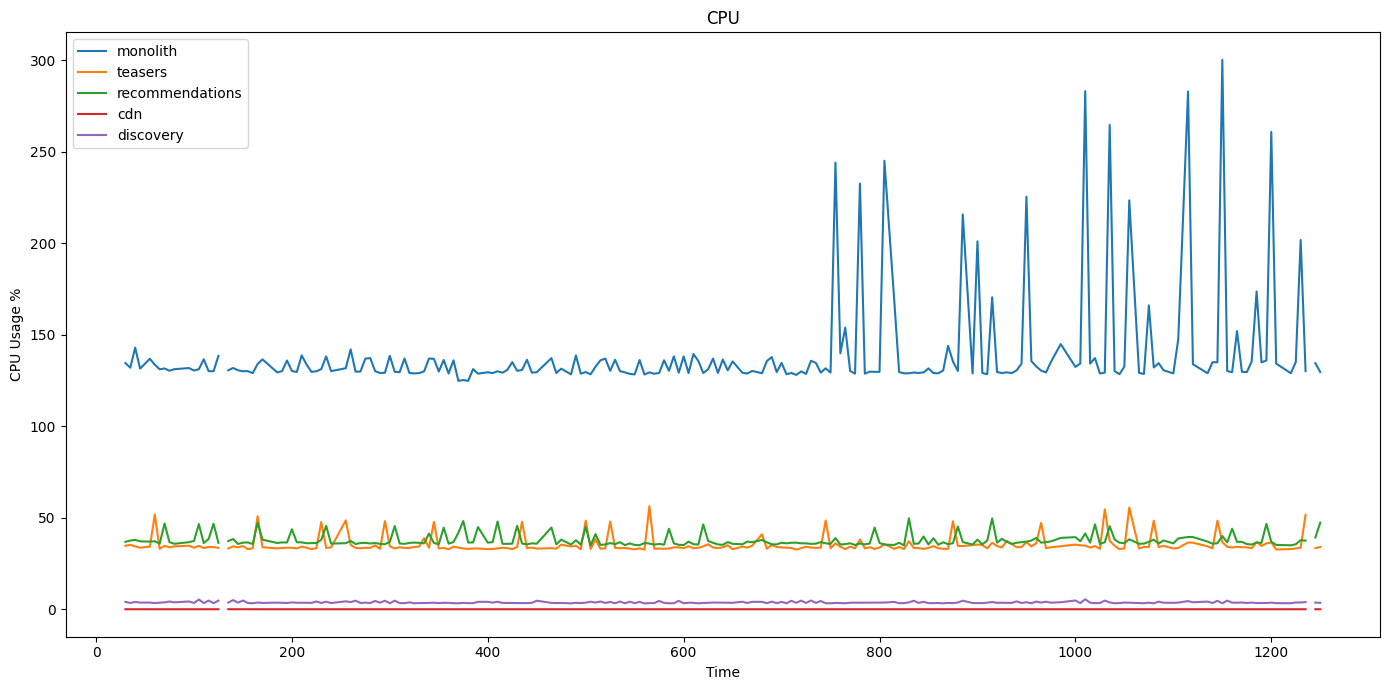

In [15]:
fig, ax = plt.subplots(figsize=(14, 7))

for s in services:
    ax.plot( df_10000['timestamp'], df_10000[f'{s}_cpu_percent'], label=s)
ax.set_title('CPU')
ax.set_xlabel('Time')
ax.set_ylabel('CPU Usage %')
ax.legend()

plt.tight_layout()
plt.show()

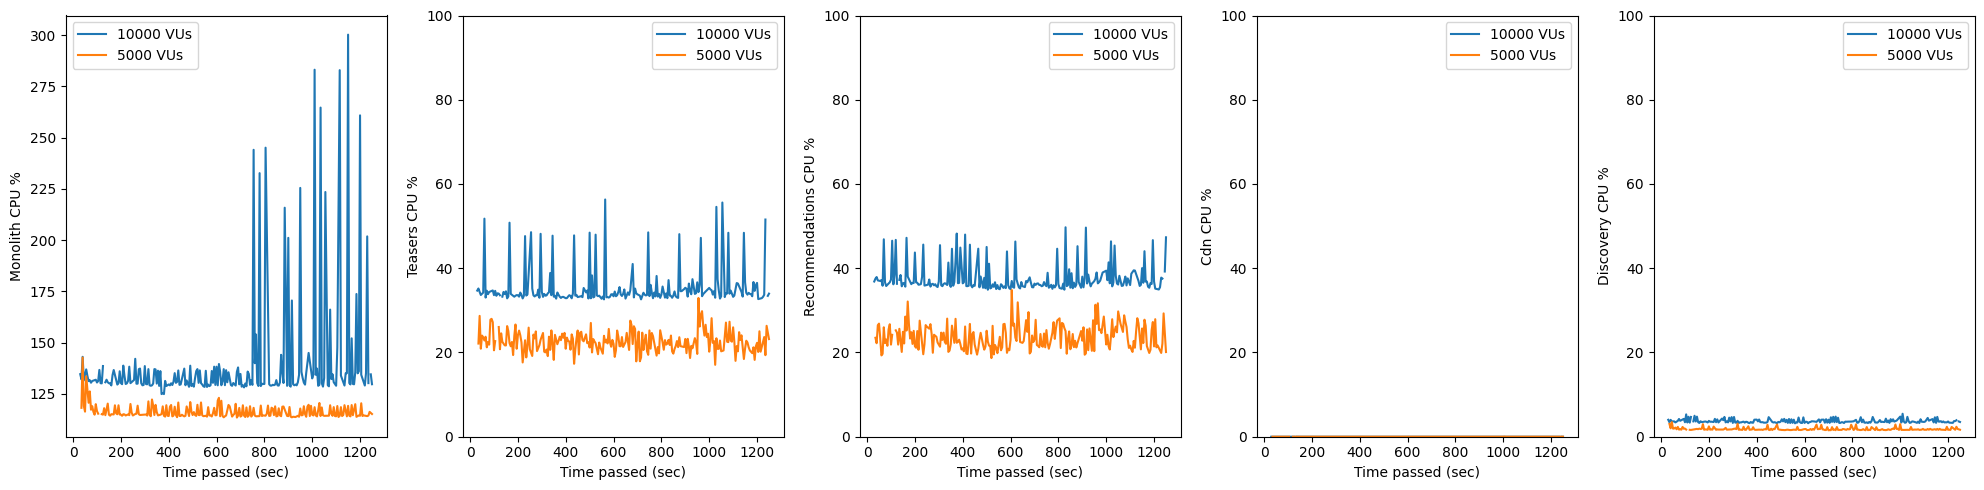

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=len(services), figsize=(20, 5))

# Memory usage line graph
for i, s in enumerate(services):
    axes[i].plot(df_10000['timestamp'], df_10000[f'{s}_cpu_percent'], label=f'10000 VUs')
    axes[i].plot(df_5000['timestamp'], df_5000[f'{s}_cpu_percent'], label=f'5000 VUs')

    axes[i].set_xlabel('Time passed (sec)')
    axes[i].set_ylabel(f'{s.capitalize()} CPU %')
    axes[i].legend()
    if i != 0:
        axes[i].set_ylim(bottom=0,top=100)
plt.tight_layout()
plt.show()


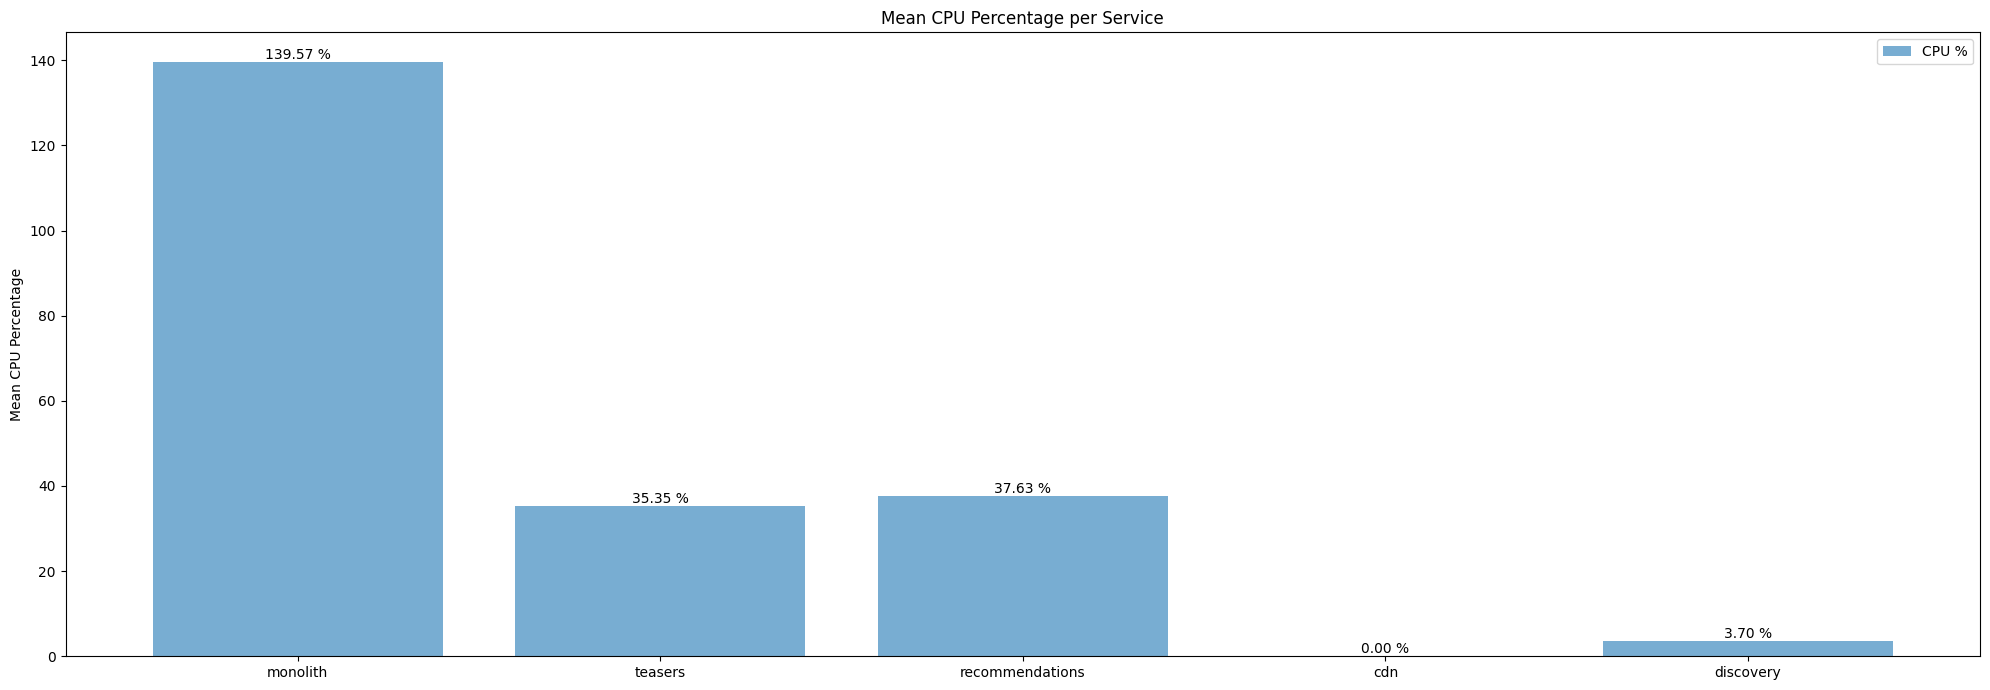

In [ ]:
fig, axes = plt.subplots(figsize=(20, 7))

bars_cpu = axes.bar(services, [df[f'{f}_cpu_percent'].mean() for f in services], label='CPU %', alpha=0.6)
axes.set_title('Mean CPU Percentage per Service')
axes.set_ylabel('Mean CPU Percentage')
axes.legend()

for bar in bars_cpu:
    height = bar.get_height()
    axes.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f} %', ha='center', va='bottom')

plt.tight_layout()
plt.show()

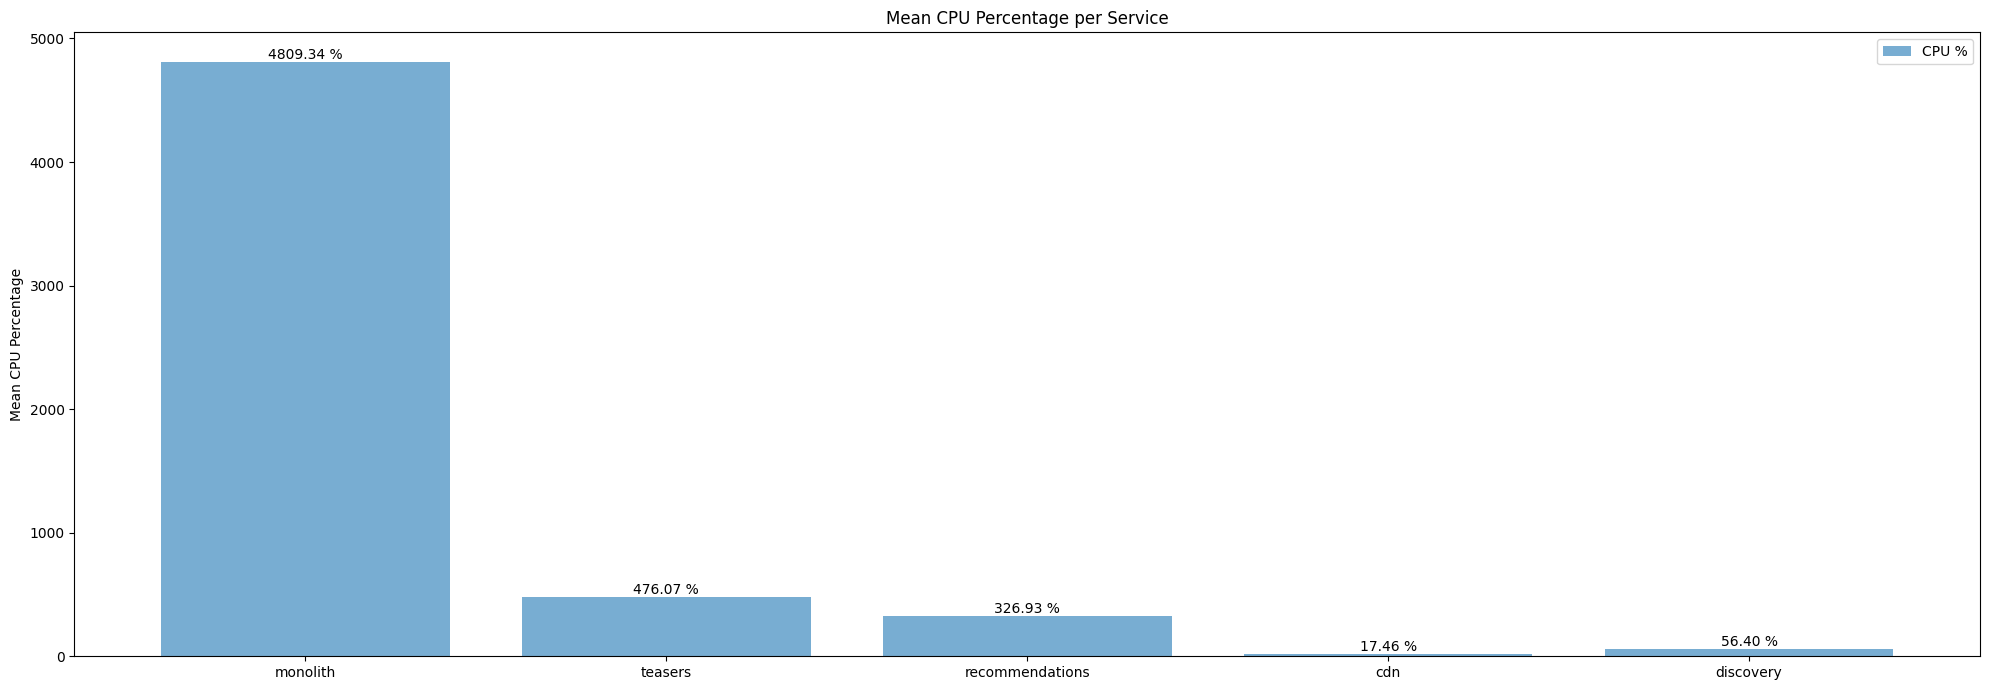

In [ ]:
fig, axes = plt.subplots(figsize=(20, 7))

bars_cpu = axes.bar(services, [df[f'{f}_mem_usage'].mean() for f in services], label='CPU %', alpha=0.6)
axes.set_title('Mean CPU Percentage per Service')
axes.set_ylabel('Mean CPU Percentage')
axes.legend()

for bar in bars_cpu:
    height = bar.get_height()
    axes.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f} %', ha='center', va='bottom')

plt.tight_layout()
plt.show()